Leveraging customer information is paramount for most
businesses. In the case of an insurance company, attributes of
customers like the ones mentioned below can be crucial in
making business decisions. Hence, knowing to explore and
generate value out of such data can be an invaluable skill to
have.

1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import ttest_ind

2. Read the data as a data frame

In [2]:
insurance = pd.read_csv('insurance.csv')

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


3. Perform basic EDA which should include the following and print out your insights at every step.

a. Shape of the data

In [5]:
shape = insurance.shape 
print("Shape ={}\nShape[0] x Shape[1] = {}". 
format(shape, shape[0]*shape[1])) 

Shape =(1338, 7)
Shape[0] x Shape[1] = 9366


b. Data type of each attribute

In [6]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

c. Checking the presence of missing values

In [7]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

d. 5 point summary of numerical attributes

In [8]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
print('Min age : {0}'.format(insurance['age'].min())) 
print('Max age : {0}'.format(insurance['age'].max())) 
print('age range : {0}'.format(insurance['age'].max()  - insurance['age'].min())) 
print('25 percentile : {0}'.format(insurance['age'].quantile(.25))) 
print('50 percentile : {0}'.format(insurance['age'].quantile(.5))) 
print('75 percentile : {0}'.format(insurance['age'].quantile(.75))) 
print('Variance age : {0}'.format(insurance['age'].var())) 
print('Standard deviation age : {0}'.format(insurance['age'].std()))

Min age : 18
Max age : 64
age range : 46
25 percentile : 27.0
50 percentile : 39.0
75 percentile : 51.0
Variance age : 197.40138665754424
Standard deviation age : 14.049960379216172


In [10]:
print('Min age : {0}'.format(insurance['bmi'].min())) 
print('Max age : {0}'.format(insurance['bmi'].max())) 
print('age range : {0}'.format(insurance['bmi'].max()  - insurance['bmi'].min()))
print('25 percentile : {0}'.format(insurance['bmi'].quantile(.25))) 
print('50 percentile : {0}'.format(insurance['bmi'].quantile(.5))) 
print('75 percentile : {0}'.format(insurance['bmi'].quantile(.75))) 
print('Variance age : {0}'.format(insurance['bmi'].var())) 
print('Standard deviation age : {0}'.format(insurance['bmi'].std())) 

Min age : 15.96
Max age : 53.13
age range : 37.17
25 percentile : 26.29625
50 percentile : 30.4
75 percentile : 34.69375
Variance age : 37.187883609773266
Standard deviation age : 6.098186911679017


In [11]:
print('Min age : {0}'.format(insurance['charges'].min())) 
print('Max age : {0}'.format(insurance['charges'].max())) 
print('age range : {0}'.format(insurance['charges'].max()  - insurance['charges'].min()))
print('25 percentile : {0}'.format(insurance['charges'].quantile(.25))) 
print('50 percentile : {0}'.format(insurance['charges'].quantile(.5))) 
print('75 percentile : {0}'.format(insurance['charges'].quantile(.75)))
print('Variance age : {0}'.format(insurance['charges'].var()))
print('Standard deviation age : {0}'.format(insurance['charges'].std()))

Min age : 1121.8739
Max age : 63770.42801
age range : 62648.554110000005
25 percentile : 4740.28715
50 percentile : 9382.033
75 percentile : 16639.912515
Variance age : 146652372.1528548
Standard deviation age : 12110.011236693994


e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

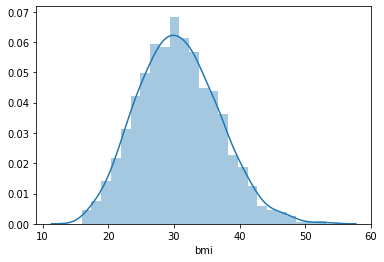

In [12]:
sns.distplot(insurance['bmi'])

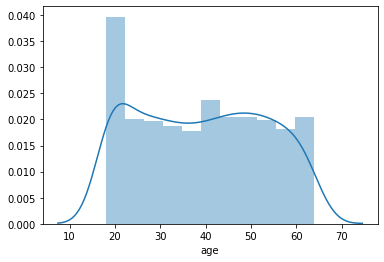

In [13]:
sns.distplot(insurance['age'])

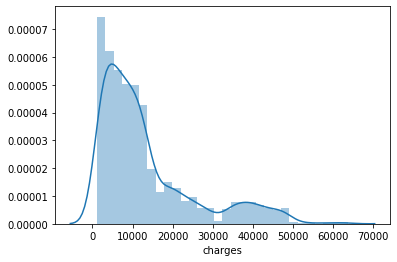

In [14]:
sns.distplot(insurance['charges'])

In [15]:
# Using the Log function on the "Charges" column
insurance['charges_log_value'] = np.log(insurance['charges'])

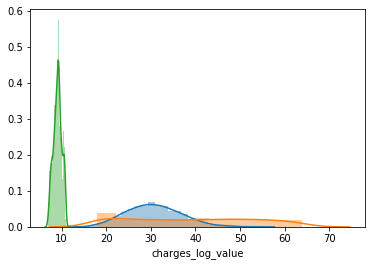

In [16]:
# Checking the distribution of bmi, age & charges column
sns.distplot(insurance['bmi'])
sns.distplot(insurance['age'])
sns.distplot(insurance['charges_log_value'])

f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’
columns

In [17]:
skew_bmi = insurance['bmi'].skew(axis = 0, skipna = True)
skew_age = insurance['age'].skew(axis = 0, skipna = True)
skew_charges = insurance['charges'].skew(axis = 0, skipna = True)
print("skweness in bmi is = {}\nskweness in age is = {}\nskweness in charges is = {}". 
format(skew_bmi, skew_age, skew_charges))

skweness in bmi is = 0.2840471105987448
skweness in age is = 0.05567251565299186
skweness in charges is = 1.5158796580240388


g. Checking the presence of outliers in ‘bmi’, ‘age’ and
‘charges columns

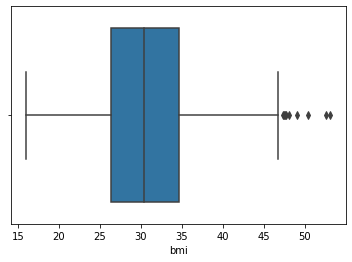

In [18]:
sns.boxplot(x=insurance['bmi'])

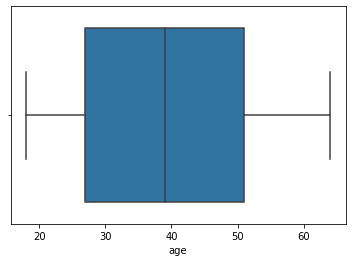

In [19]:
sns.boxplot(x=insurance['age'])

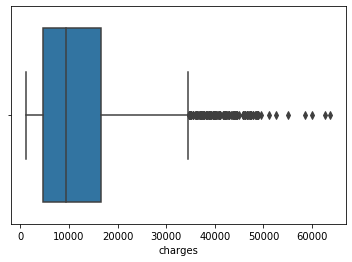

In [20]:
sns.boxplot(x=insurance['charges'])

h. Distribution of categorical columns (include
children)

In [82]:
#insurance_test = insurance
#insurance_test['children'] = insurance_test.children.astype('category')
#insurance_test.dtypes

age                     int64
sex                    object
bmi                   float64
children             category
smoker                 object
region                 object
charges               float64
charges_log_value     float64
dtype: object

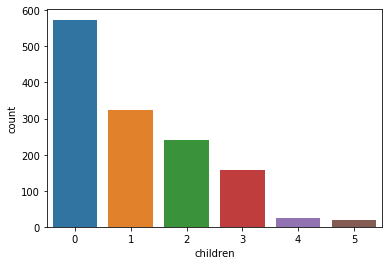

In [83]:
#sns.countplot(x="children", data=insurance_test)

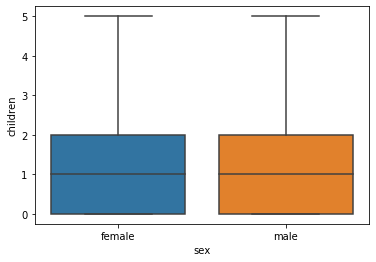

In [21]:
sns.boxplot(x= 'sex', y ='children', data = insurance)

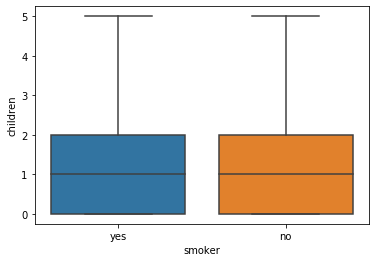

In [22]:
sns.boxplot(x= 'smoker', y ='children', data = insurance)

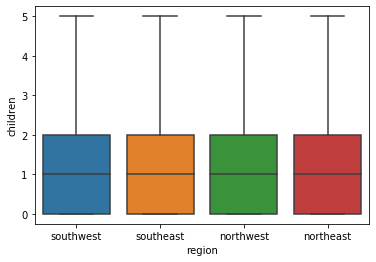

In [23]:
sns.boxplot(x='region', y ='children', data = insurance)

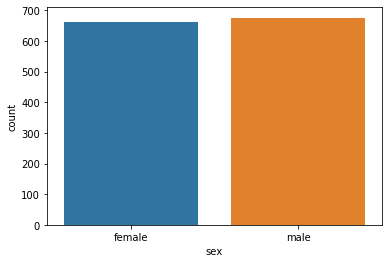

In [24]:
sns.countplot(insurance['sex'])

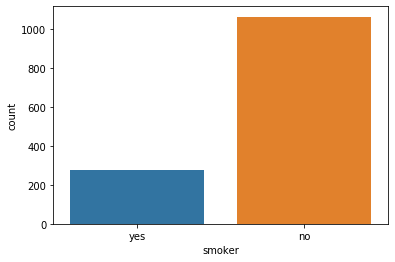

In [25]:
sns.countplot(insurance['smoker'])

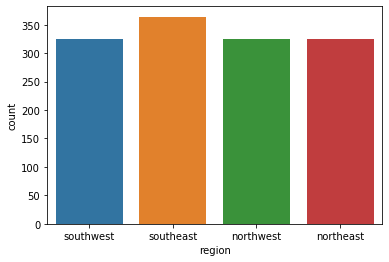

In [26]:
sns.countplot(insurance['region'])

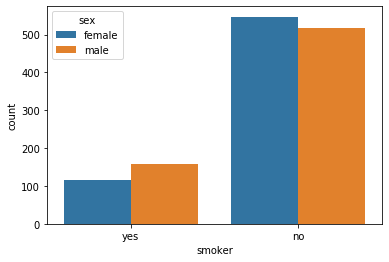

In [27]:
sns.countplot(x='smoker',hue='sex',data= insurance)

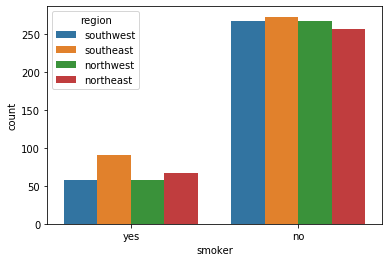

In [28]:
sns.countplot(x='smoker',hue='region',data= insurance)

i. Pair plot that includes all the columns of the data
frame

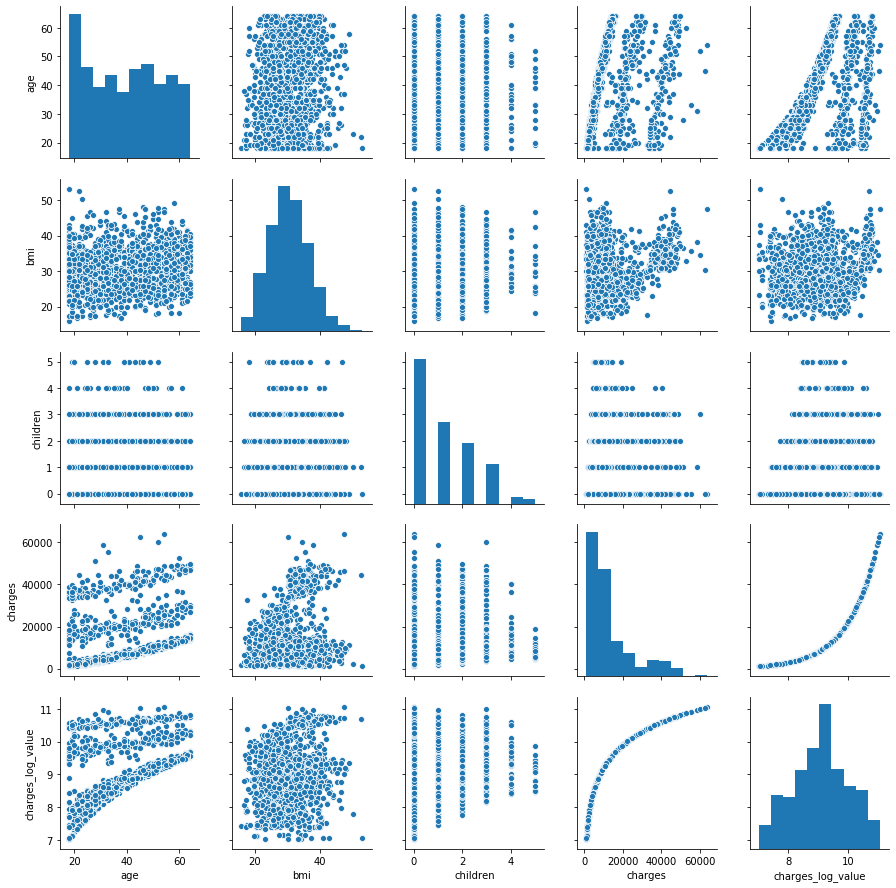

In [29]:
sns.pairplot(insurance)

## 4. Answer the following questions with statistical evidence

a. Do charges of people who smoke differ significantly
from the people who don't?

In [30]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,charges_log_value
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,8.260197


In [31]:
smoker = insurance[insurance.smoker == 'yes']
non_smoker = insurance[insurance.smoker == 'no']

In [32]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(smoker['charges'], non_smoker['charges'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=46.665, p=0.000
Probably different distributions


In [33]:
print('Mean of smoker is %2.1f and Sd is %2.1f' % (smoker['charges'].mean(),np.std(smoker['charges'],ddof = 1)))
print('Mean of non smoker is %2.1f and Sd is %2.1f' % (non_smoker['charges'].mean(),np.std(non_smoker['charges'],ddof = 1)))

Mean of smoker is 32050.2 and Sd is 11541.5
Mean of non smoker is 8434.3 and Sd is 5993.8


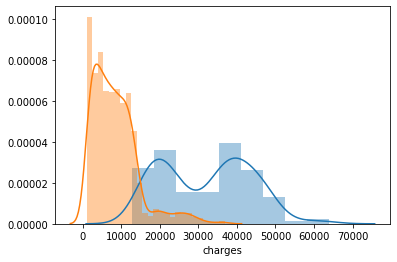

In [34]:
sns.distplot(smoker['charges'])
sns.distplot(non_smoker['charges'])

b. Does bmi of males differ significantly from that of
females?

In [35]:
male = insurance[insurance.sex == 'male']
female = insurance[insurance.sex == 'female']

In [36]:
stat, p = ttest_ind(male['bmi'], female['bmi'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=1.697, p=0.090
Probably the same distribution


In [37]:
print('Mean of males BMI is %2.1f and Sd is %2.1f' % (male['bmi'].mean(),np.std(male['bmi'],ddof = 1)))
print('Mean of females BMI is %2.1f and Sd is %2.1f' % (female['bmi'].mean(),np.std(female['bmi'],ddof = 1)))

Mean of males BMI is 30.9 and Sd is 6.1
Mean of females BMI is 30.4 and Sd is 6.0


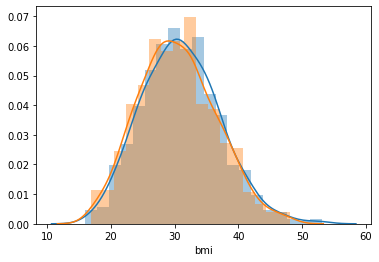

In [38]:
sns.distplot(male['bmi'])
sns.distplot(female['bmi'])

c. Is the proportion of smokers significantly different
in different genders?

Ho = The proportions are equal
<br>
Ha = The two proportions are not equal

In [39]:
female_smokers = insurance[insurance['sex'] == 'female'].smoker.value_counts()[1]
male_smokers = insurance[insurance['sex'] == 'male'].smoker.value_counts()[1]
n_females = insurance.sex.value_counts()[1]
n_males = insurance.sex.value_counts()[0]

In [40]:
print([female_smokers, male_smokers] , [n_females, n_males])
print(f' Proportion of smokers in females, males = {round(115/662,2)}%, {round(159/676,2)}% respectively')

[115, 159] [662, 676]
 Proportion of smokers in females, males = 0.17%, 0.24% respectively


In [41]:
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])

if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant.|| We reject the null ||')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant.|| We fail to reject the null ||')

With a p-value of 0.0053 the difference is significant.|| We reject the null ||


d. Is the distribution of bmi across women with no
children, one child and two children, the same ?

In [42]:
df_female = insurance[insurance['sex'] == 'female']
df_female['sex'].unique()

array(['female'], dtype=object)

In [43]:
df_zero_child = df_female[df_female['children'] == 0]
df_one_child = df_female[df_female['children'] == 1]
df_two_child = df_female[df_female['children'] == 2]

In [44]:
print('Mean and standard deviation of bmi of female with zero child are : %3.2f and %3.2f' % (df_zero_child['bmi'] .mean(),np.std(df_zero_child['bmi'] ,ddof =1)))
print('Mean and standard deviation of bmi of female with one child are : %3.2f and %3.2f' % (df_one_child['bmi'] .mean(),np.std(df_one_child['bmi'] ,ddof =1)))
print('Mean and standard deviation of bmi of female with two child are : %3.2f and %3.2f' % (df_two_child['bmi'] .mean(),np.std(df_two_child['bmi'] ,ddof =1)))

Mean and standard deviation of bmi of female with zero child are : 30.36 and 5.97
Mean and standard deviation of bmi of female with one child are : 30.05 and 5.79
Mean and standard deviation of bmi of female with two child are : 30.65 and 6.63


In [45]:
mean_bmi_df = pd.DataFrame()

df1            = pd.DataFrame({'number_of_child': '0', 'bmi':df_female['bmi']})
df2            = pd.DataFrame({'number_of_child': '1', 'bmi':df_female['bmi']})
df3            = pd.DataFrame({'number_of_child': '2', 'bmi':df_female['bmi']})

mean_bmi_df = mean_bmi_df.append(df1) 
mean_bmi_df = mean_bmi_df.append(df2) 
mean_bmi_df = mean_bmi_df.append(df3) 

In [46]:
mean_bmi_df.head()

,number_of_child,bmi
0,0,27.90
5,0,25.74
6,0,33.44
7,0,27.74
9,0,25.84


In [47]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('bmi ~ number_of_child', data = mean_bmi_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                       sum_sq      df             F  PR(>F)
number_of_child  3.877319e-24     2.0  5.303492e-26     1.0
Residual         7.248737e+04  1983.0           NaN     NaN


p value is 1.0 and it is more than our chosen level of signifance at 5%
<br>
So the statistical decision is to fail to reject the null hypothesis at 5% level of significance.

In [48]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(mean_bmi_df['bmi'], mean_bmi_df['number_of_child']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     0      1      0.0   0.9 -0.7795 0.7795  False
     0      2      0.0   0.9 -0.7795 0.7795  False
     1      2      0.0   0.9 -0.7795 0.7795  False
--------------------------------------------------


In this example, 
* zero child vs one child : Since the result - reject is false, bmi of female is statistically equal to Female with zero child and  Female with one child.
* zero child vs two child : Since the result - reject is false, bmi of female is statistically equal to Female with zero child and  Female with two child.
* one child vs two child : Since the result - reject is false, bmi of female is statistically equal to Female with one child and  Female with two child.

Text(0.5, 1.0, 'Mean of BMI of females with no of childs')

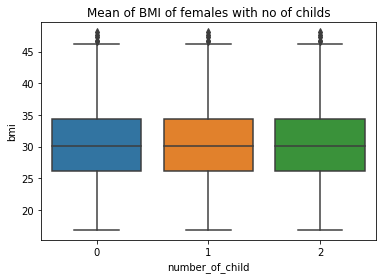

In [49]:
sns.boxplot(x = "number_of_child", y = "bmi", data = mean_bmi_df)
plt.title('Mean of BMI of females with no of childs')

C:\Users\Kumar Ayush\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Kumar Ayush\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


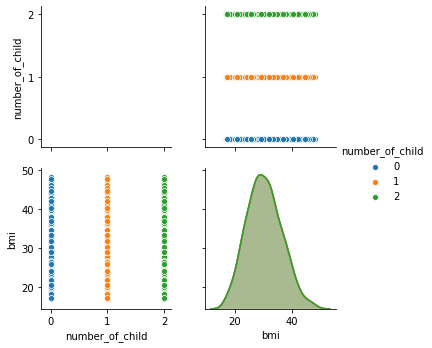

In [50]:
sns.pairplot(mean_bmi_df,hue='number_of_child')